In [1]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")

Loading required package: igraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [6]:
set.seed(0)

### Create Random graph using ER model

#### **1.a)**
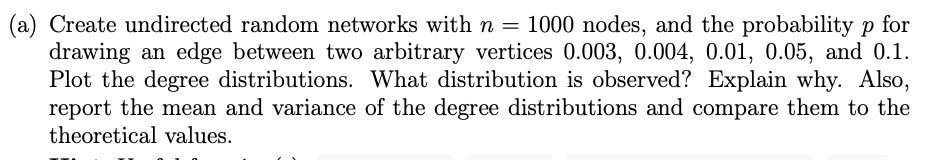

---

Soln : ER model is a random graph generation model, where each edge exist with a probability p. Therefore for a node to have degree k it should be exactly connected to k edges.
\begin{align}
        P(Deg = k) = \binom{N}{k} \cdot p^k(1-p)^{N-k}
    \end{align}
The distribution of degree of any node is therefore **binomial**.


\begin{array}{lllll}
Prob  & Actual Mean                                  & Theoretical Mean (n*p) & ~Actual Variance~                             & Theoretical Variance (n*p*(1-p))  \\
0.003 & 2.944000 & 3.0                    & 3.308424  & 2.991                             \\
0.004 & 4.014000 & 4.0                    & 4.465682  & 3.984                             \\
0.01  & 9.960000 & 10.0                   & 9.601217  & 9.9                               \\
0.05  & 49.41800 & 50.0                   & 45.590306 & 47.5                              \\
0.1   & 99.51600 & 100.0                  & 97.209225 & 90.0                             
\end{array}


In [7]:
#Q1.a
prob_vec <- c(0.003, 0.004,0.01,0.05,0.1)
num_nodes <- 1000

[1] "ER model with prob =0.003000 "


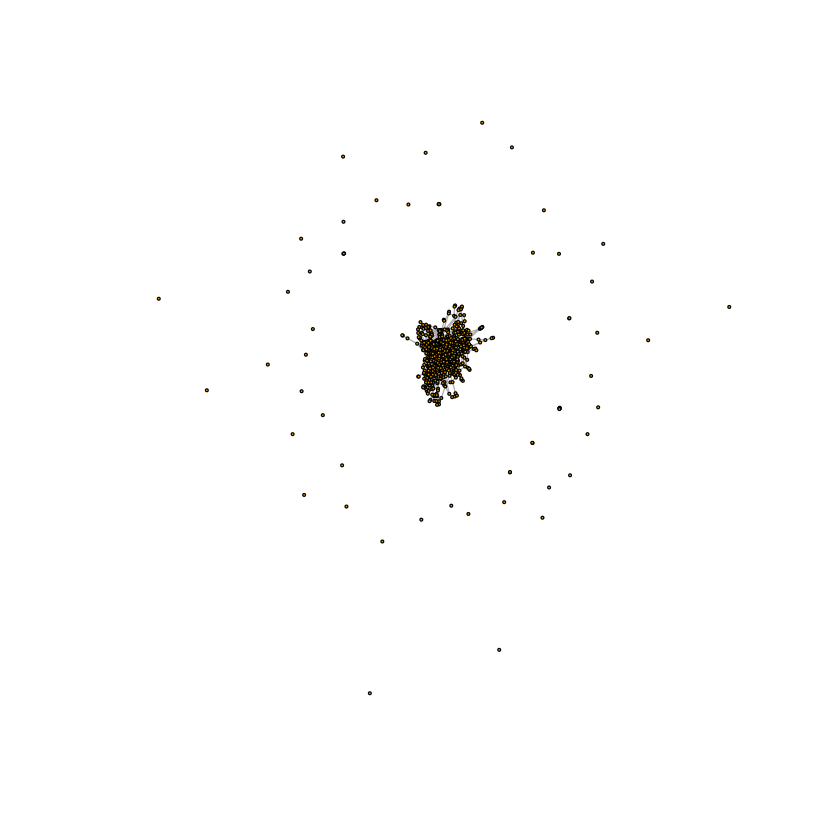

[1] "prob =0.003000 , mean = 3.122000 , variance = 3.308424 "
[1] "--------------------"

[1] "ER model with prob =0.004000 "


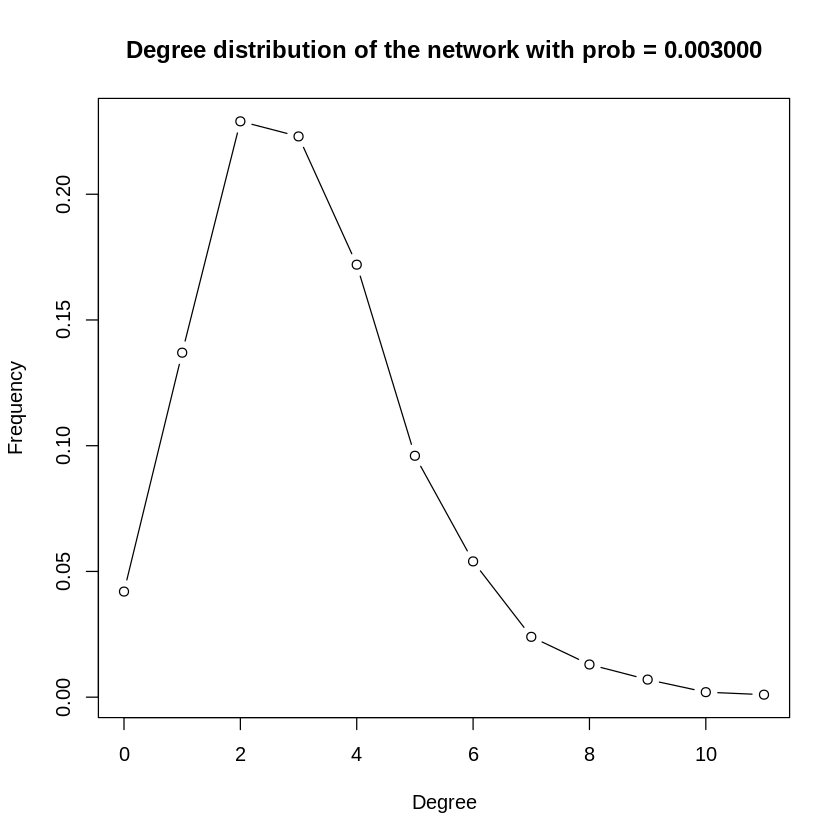

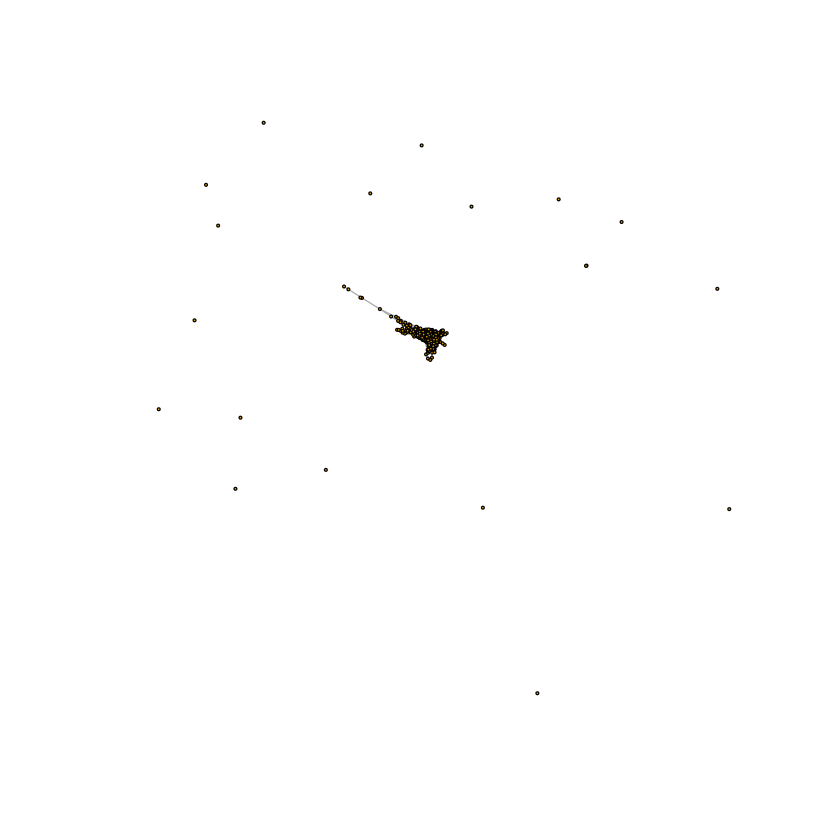

[1] "prob =0.004000 , mean = 4.028000 , variance = 4.465682 "
[1] "--------------------"

[1] "ER model with prob =0.010000 "


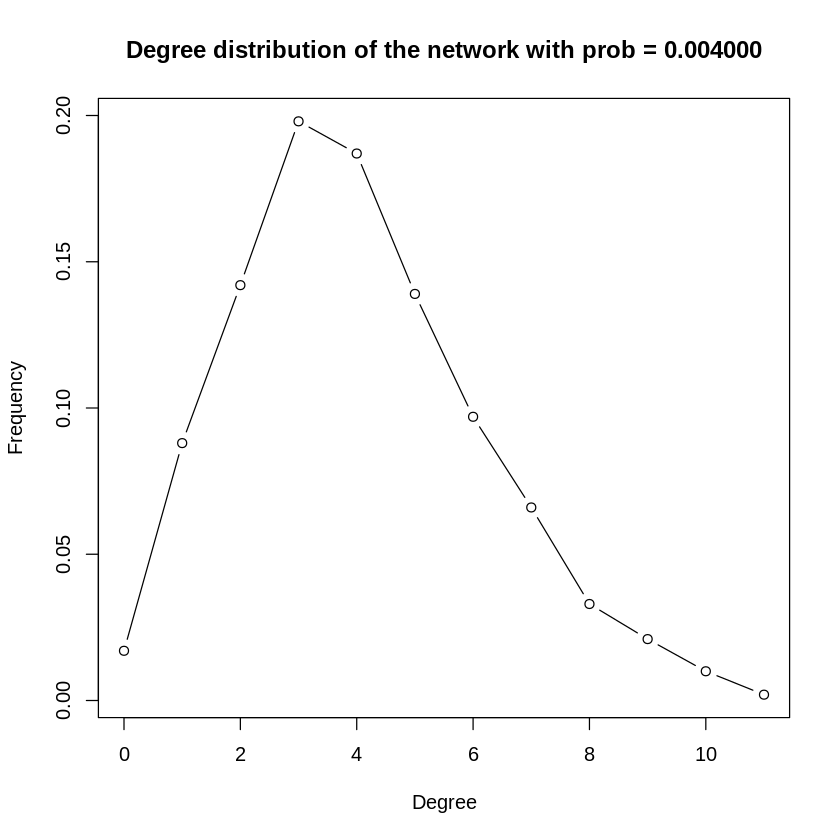

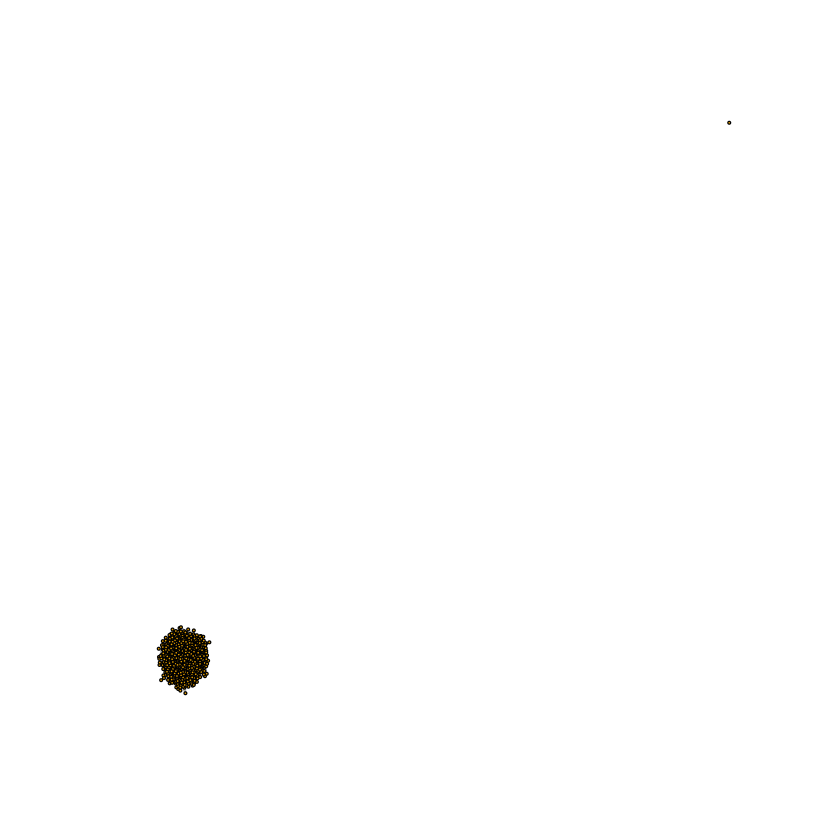

[1] "prob =0.010000 , mean = 9.872000 , variance = 9.601217 "
[1] "--------------------"

[1] "ER model with prob =0.050000 "


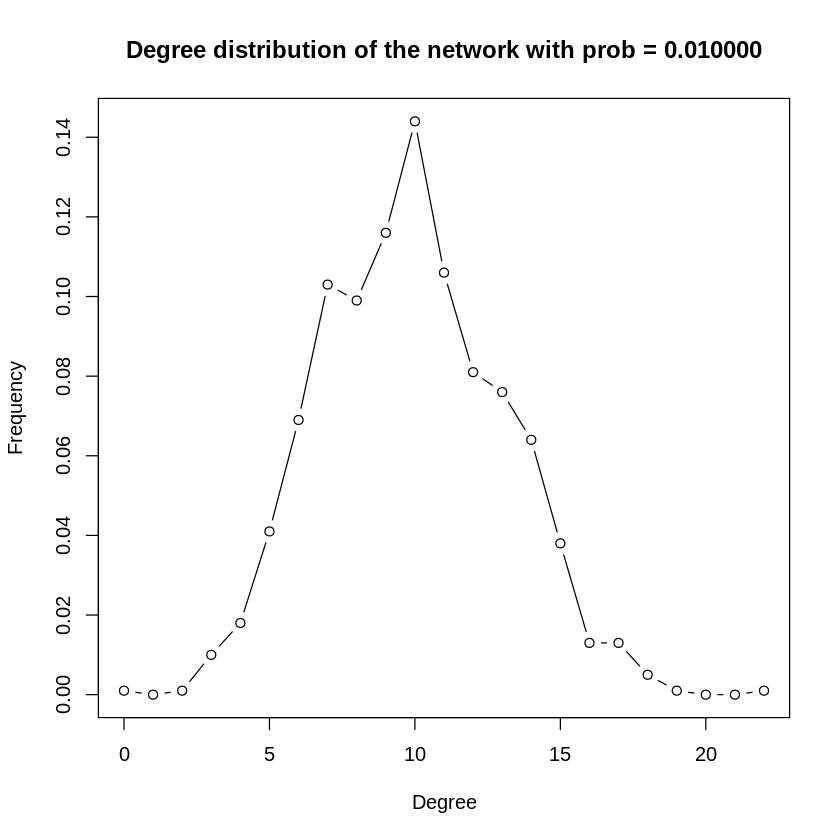

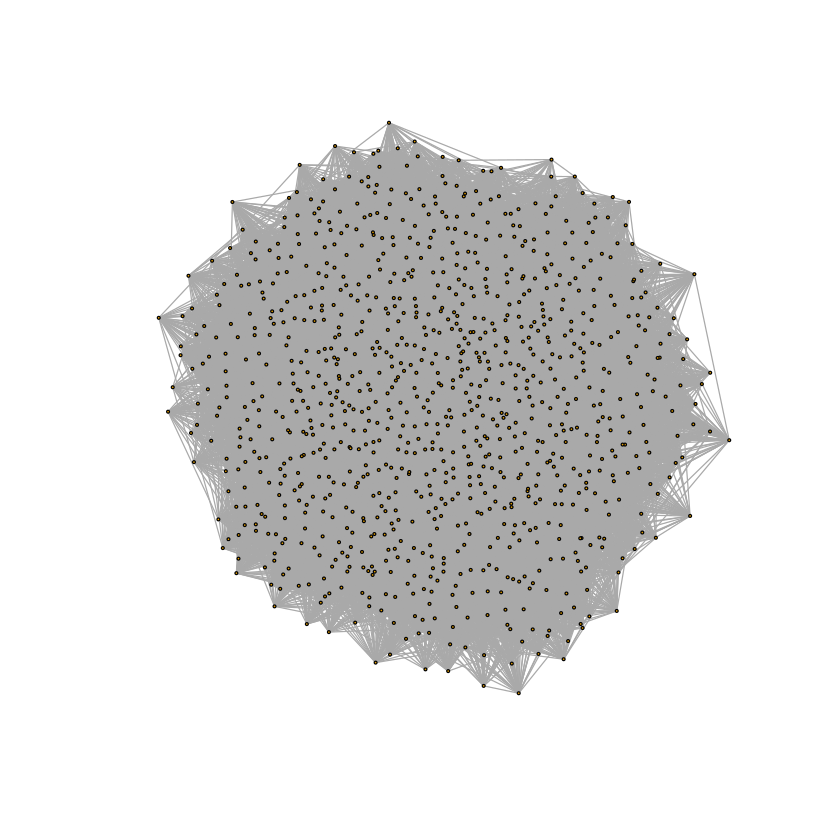

[1] "prob =0.050000 , mean = 50.222000 , variance = 45.590306 "
[1] "--------------------"

[1] "ER model with prob =0.100000 "


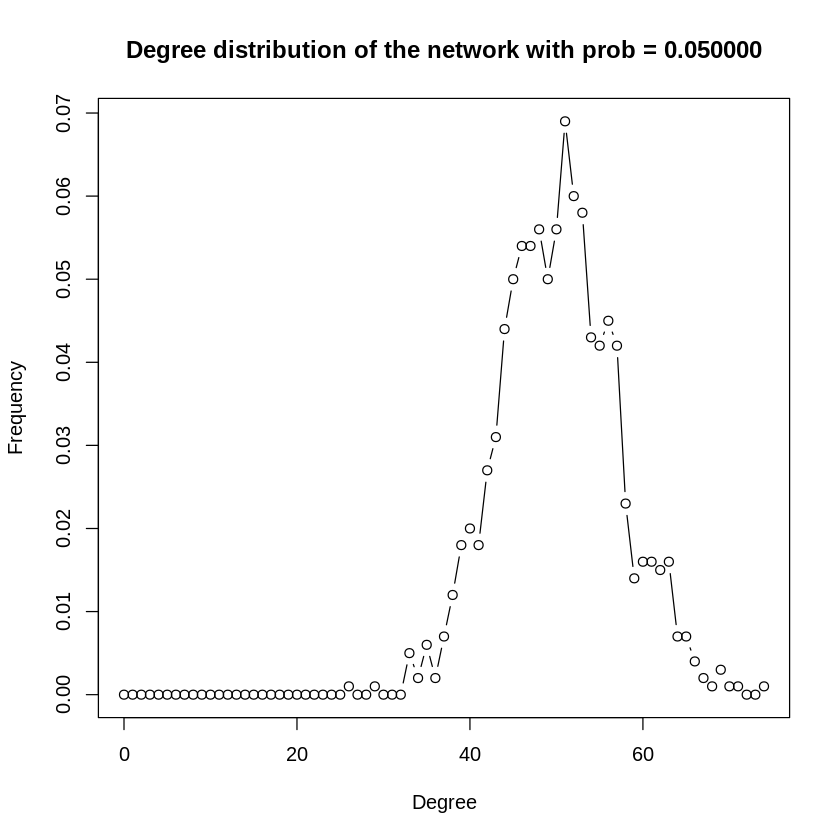

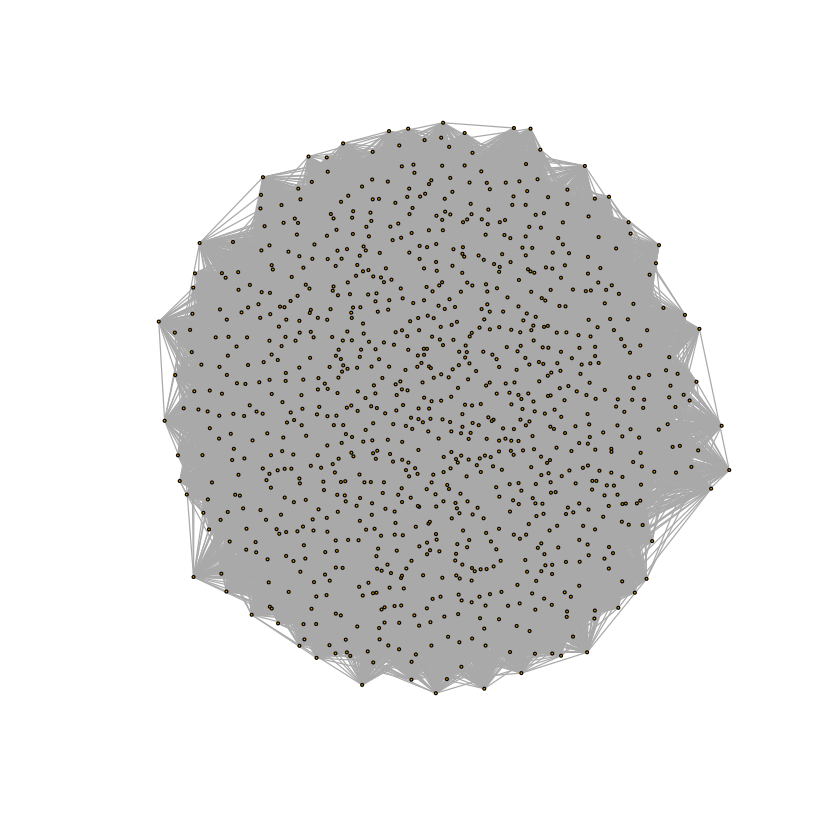

[1] "prob =0.100000 , mean = 99.772000 , variance = 97.209225 "
[1] "--------------------"



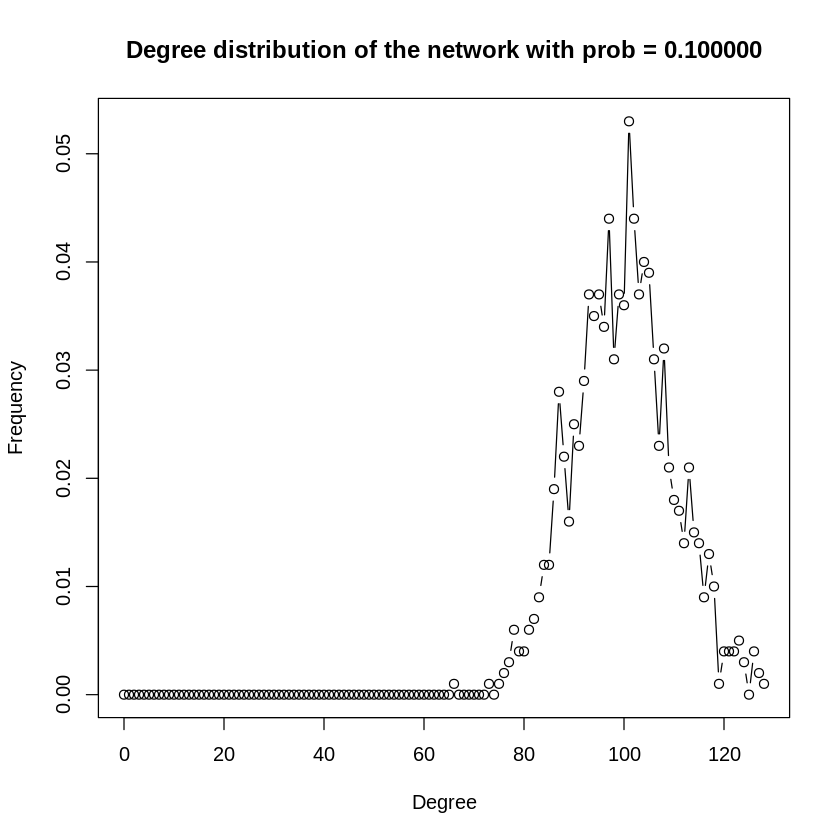

In [8]:

for(prob in prob_vec) {
    print(sprintf("ER model with prob =%f ",prob))
    # g <- erdos.renyi.game(num_nodes, p=prob, directed=F)
    g <- sample_gnp(num_nodes,prob,directed = FALSE)
    plot(g, vertex.size=1, vertex.label=NA)
    plot(seq_along(degree.distribution(g)) - 1, degree.distribution(g), type="b",main=sprintf("Degree distribution of the network with prob = %f",prob),xlab="Degree",ylab="Frequency")
    print(sprintf("prob =%f , mean = %f , variance = %f ",prob,  mean(degree(g)), var(degree(g))))
    print('--------------------')
    cat("\n")

}

### Giant connected component

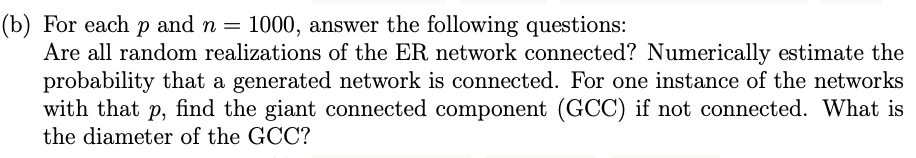

---

No, not all random realization of ER network are connected. The probability that generated random networks are connected and diameter of their GCC is shown in the table. 

\begin{array}{lllll}
Prob  & Prob \: of \: being \: connected  & Single \: instance \: connected & Diameter \: of \: GCC   \\
0.003 & 0.0000 & NO                    & 13                             \\
0.004 & 0.0000 & NO                    & 11                             \\
0.01  & 0.9620 & YES                   & 5                               \\
0.05  & 1.0000 & YES                   & 3                             \\
0.1   & 1.0000 & YES                  & 3                             
\end{array}

In [ ]:
for(prob in prob_vec)
{
    num_connected_graph <- 0
    for (i in 1:1000)
    {
        g <- erdos.renyi.game(num_nodes, p=prob, directed=F)
        if(is.connected(g))
        {
            num_connected_graph <- num_connected_graph + 1
        }
    }
    prob_connected <- num_connected_graph/1000.0
    g_components <- clusters(g)
    ind <- which.max(g_components$csize)
    gcc <- induced.subgraph(g,which(g_components$membership == ind))
    dia <- diameter(gcc)
    print(sprintf("ER model generated with prob =%f , Prob that network connected = %f , Diameter of GCC = %d ",prob,  prob_connected, dia))
    cat("\n")
}

[1] "ER model generated with prob =0.003000 , Prob that network connected = 0.000000 , Diameter of GCC = 13 "

[1] "ER model generated with prob =0.004000 , Prob that network connected = 0.000000 , Diameter of GCC = 11 "

[1] "ER model generated with prob =0.010000 , Prob that network connected = 0.962000 , Diameter of GCC = 5 "

[1] "ER model generated with prob =0.050000 , Prob that network connected = 1.000000 , Diameter of GCC = 3 "

[1] "ER model generated with prob =0.050000 , Prob that network connected = 1.000000 , Diameter of GCC = 3 "



### Normalized GCC

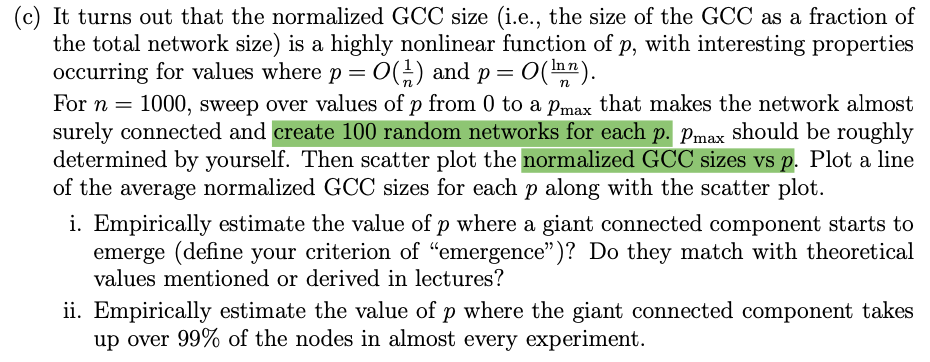

---

For purpose of plotting graph we have varied p from 0 to pmax = 0.01 at which it is surely almost converged.

**1.1.c.1**
From the graph we can see that normalizaed GCC start to emerge at probability p = 0.001. Normalized GCC emerges corresponds to the point where its value gradually increases from 0. Theoretically, it happens at p~O(1/n). In our case n= 1000. So theoretical and experimental result match.

**1.1.c.2**
From the graph of Normalized Avg GCC vs p, it can be seen that after p~0.006 the value of normalized average GCC is almost 1 and GCC takes up over 99% of the nodes. Theoretically it corresponds to O(log(n)/n).

In [20]:
pmin <- 0 
pmax <- 0.01
prob_vec <- seq(from = pmin, to = pmax, by = 0.0001)
num_network_per_prob <- 100.0
nodes <- 1000

len_gcc <- length(prob_vec) * num_network_per_prob
gcc_size <- rep(0.05, len_gcc) # initialize a vec to save gcc for each net
x <- rep(prob_vec, each = num_network_per_prob) # repeating prob vec to create x cord for graph 
j <- 1
k <- 1
gcc_size_avg <- rep(0.05, length(prob_vec))
for(prob in prob_vec)
{
    gcc_size_avg[k] <- 0
    for(i in 1:num_network_per_prob)
    {
        g <- erdos.renyi.game(nodes, p=prob, directed=F)
        g_components <- clusters(g)
        idx <- which.max(g_components$csize)
        gcc <- induced.subgraph(g,which(g_components$membership == idx))
        gcc_size[j] <- vcount(gcc) / nodes
        gcc_size_avg[k] <- gcc_size_avg[k] + gcc_size[j]
        j <- j+1 
    }
    gcc_size_avg[k] <- gcc_size_avg[k] / num_network_per_prob
    k <- k + 1 
}

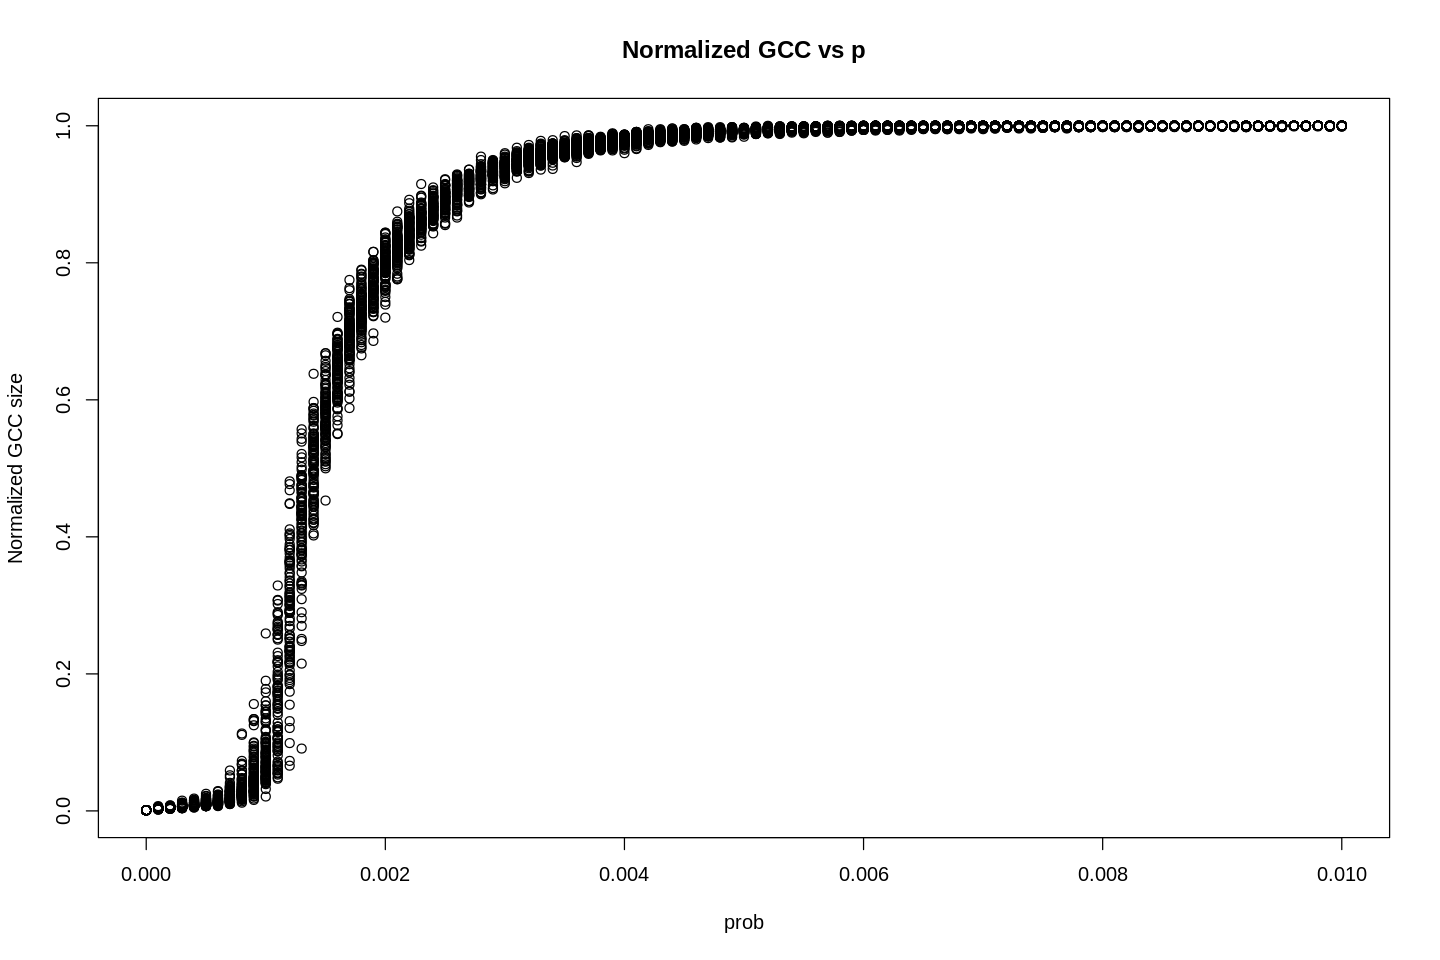

In [21]:
options(repr.plot.width=12, repr.plot.height=8)
plot(x,gcc_size,main ="Normalized GCC vs p",xlab = "prob", ylab = "Normalized GCC size")

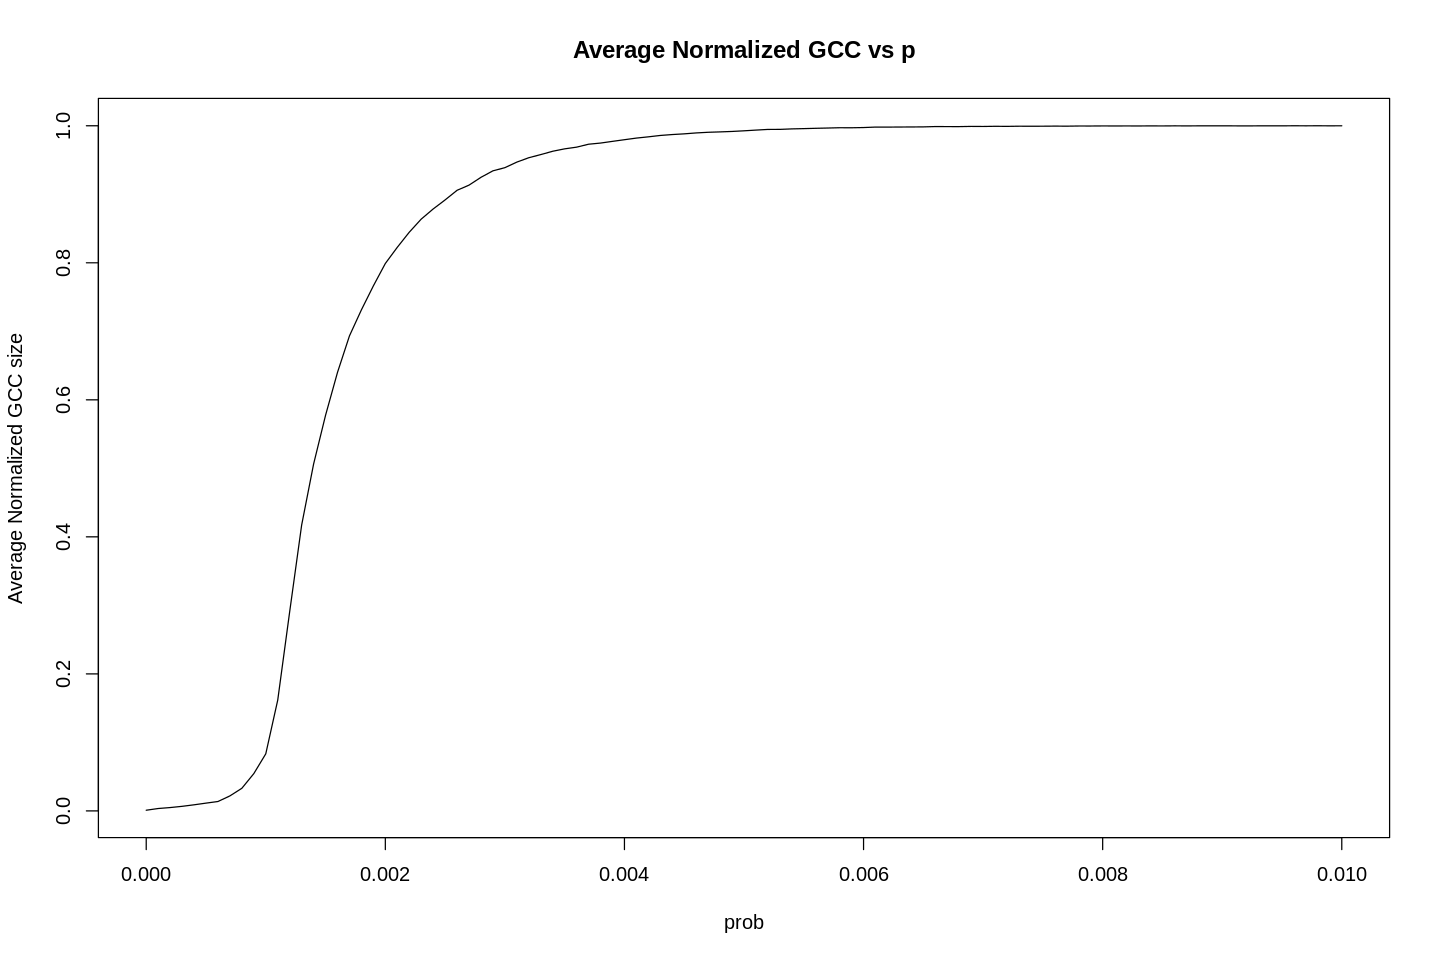

In [22]:
options(repr.plot.width=12, repr.plot.height=8)
plot(prob_vec,gcc_size_avg,main ="Average Normalized GCC vs p",xlab = "prob", ylab = "Average Normalized GCC size", type="l")

In [ ]:
num_connected_graph <- 0
for (i in 1:1000)
{
    g <- erdos.renyi.game(num_nodes, p=0.01, directed=F)
    if(is.connected(g))
    {
        num_connected_graph <- num_connected_graph + 1
    }
}
prob_connected <- num_connected_graph/1000.0

In [ ]:
print(prob_connected)

[1] 0.952


### GCC vs No of nodes

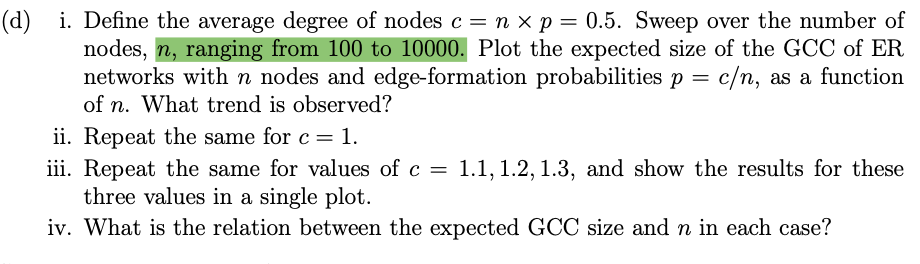

---
**1.1.d.1**
From the graph of Expected GCC size vs N for c = 0.5, we see that Expected size of GCC increases as number of node increase and it follows a kind of logarithmic trend. If np = C < 1, then an undirected graph created with ER model will almost have no connected component of size greater than O(ln(N)).


**1.1.d.2**
From the graph of Expected GCC size vs N for c = 1.0, we can observe that as the value of N increases the Expected size of GCC also increases. In this case the range E(GCC) is also larger as compared to for c = 0.5. This is analogous to the fact that 
\begin{align}
       \mathop{\mathbb{E}}(GCC) = O(n*p) = O(c)
    \end{align}

**1.1.d.3**
The result can be seen in the graph of Expected GCC size vs N.

**1.1.d.4**
From the graph of Expected GCC size vs N, it can be observed that Expected size of GCC follows a linear relation w.r.t N (number of nodes) and Expected size of GCC increases as the number of node increases.  The slope of the graph is proportional to the value of c which validates the fact that 
\begin{align}
       \mathop{\mathbb{E}}(GCC) = O(n*p) = O(c)
    \end{align}


In [49]:
Nmin <- 100 
Nmax <- 10000
N_vec <- seq(from = Nmin, to = Nmax, by = 100)
N_len <- length(N_vec)
c_vec <- c(0.5,1.0, 1.1,1.2,1.3)
c_len <- length(c_vec)
gcc_size <- matrix(1.5, nrow=c_len, ncol=N_len)
num_network_per_prob <- 100.0

In [52]:
i <- 1
for(c in c_vec)
{
    j <- 1
    for(n in N_vec)
    {
        prob <- c/n
        gcc_size[i,j] <- 0
        for(k in 1:num_network_per_prob)
        {
            g <- erdos.renyi.game(n, p=prob, directed=F)
            g_components <- clusters(g)
            idx <- which.max(g_components$csize)
            gcc <- induced.subgraph(g,which(g_components$membership == idx))
            gcc_size[i,j] <- gcc_size[i,j] + vcount(gcc)
        }
        gcc_size[i,j] <- gcc_size[i,j] / num_network_per_prob
        j <- j + 1
    }
    i <- i +1
}

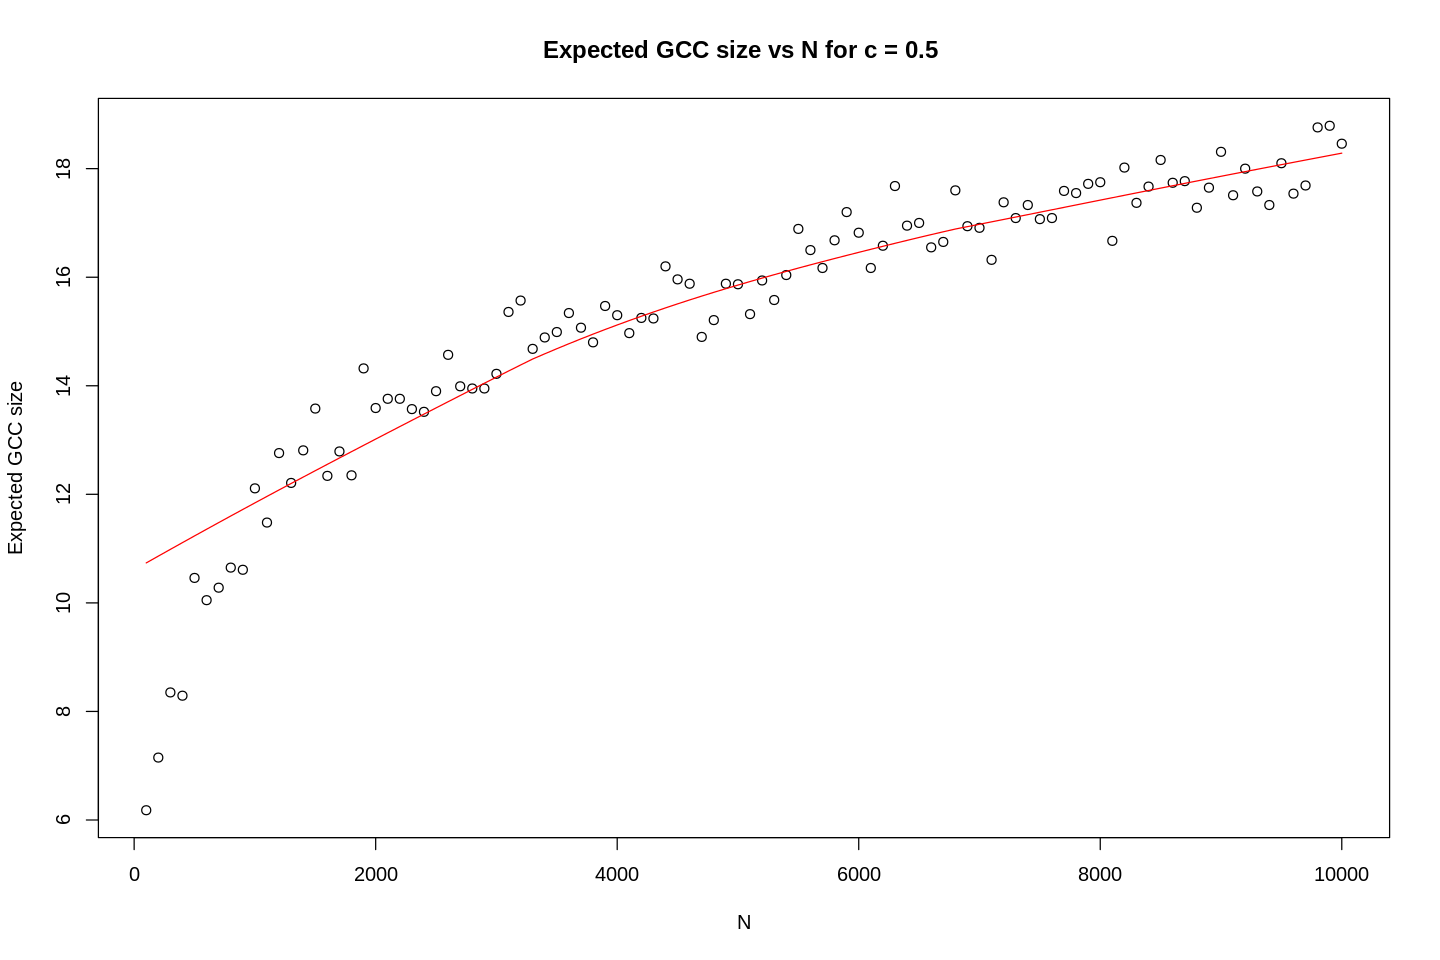

In [56]:
options(repr.plot.width=12, repr.plot.height=8)
plot(N_vec,gcc_size[1,],main ="Expected GCC size vs N for c = 0.5 ",xlab = "N", ylab = "Expected GCC size")
lines(lowess(N_vec,gcc_size[1,]), col="red")

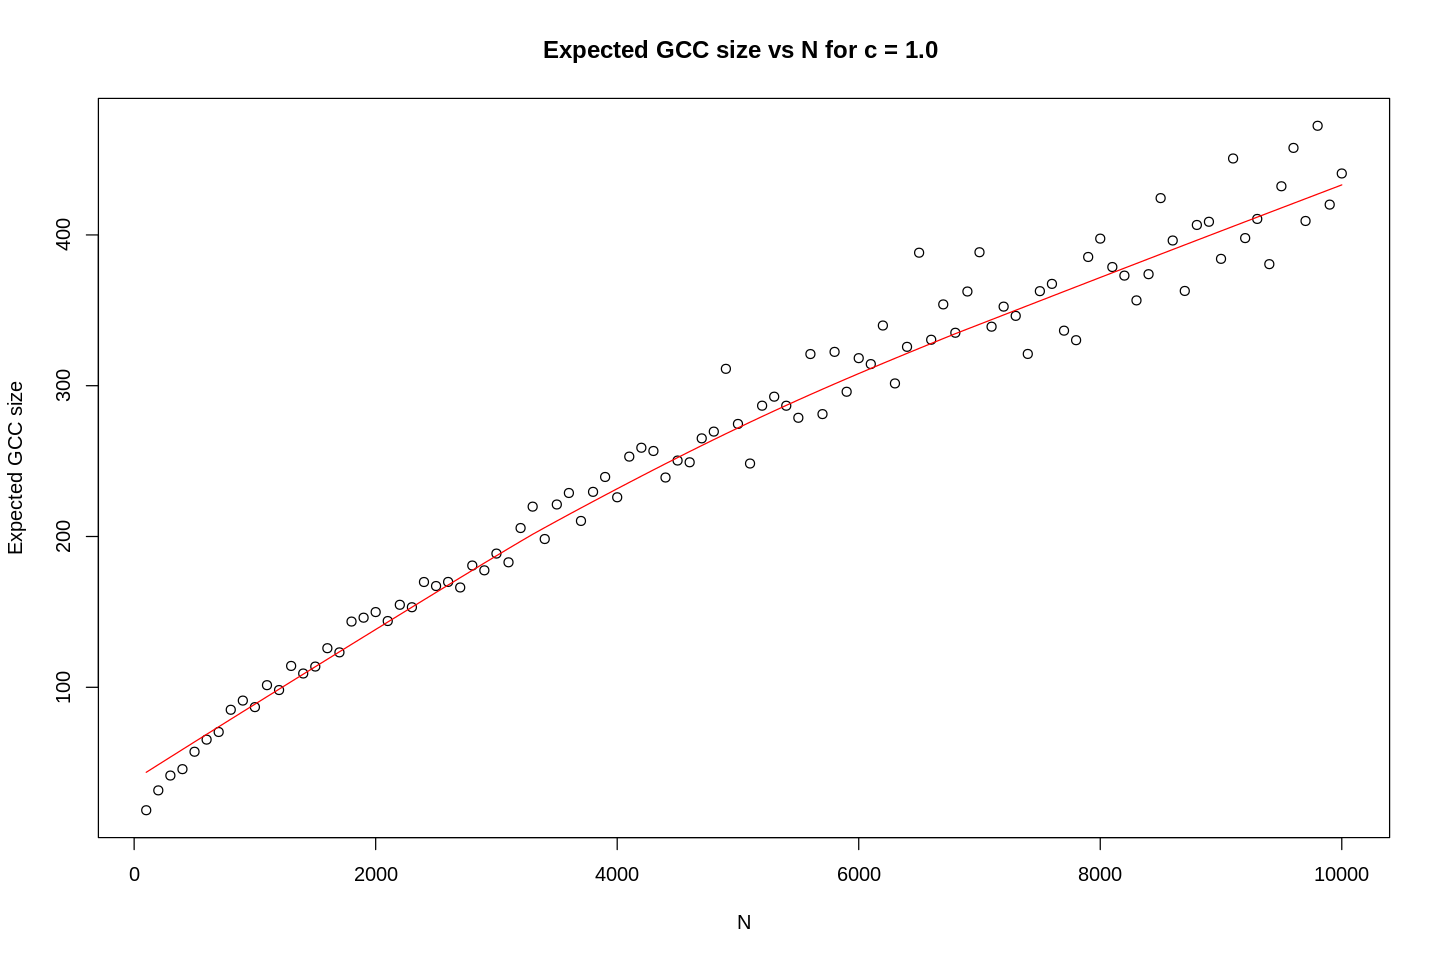

In [55]:
options(repr.plot.width=12, repr.plot.height=8)
plot(N_vec,gcc_size[2,],main ="Expected GCC size vs N for c = 1.0 ",xlab = "N", ylab = "Expected GCC size")
lines(lowess(N_vec,gcc_size[2,]), col="red")

null device 
          1

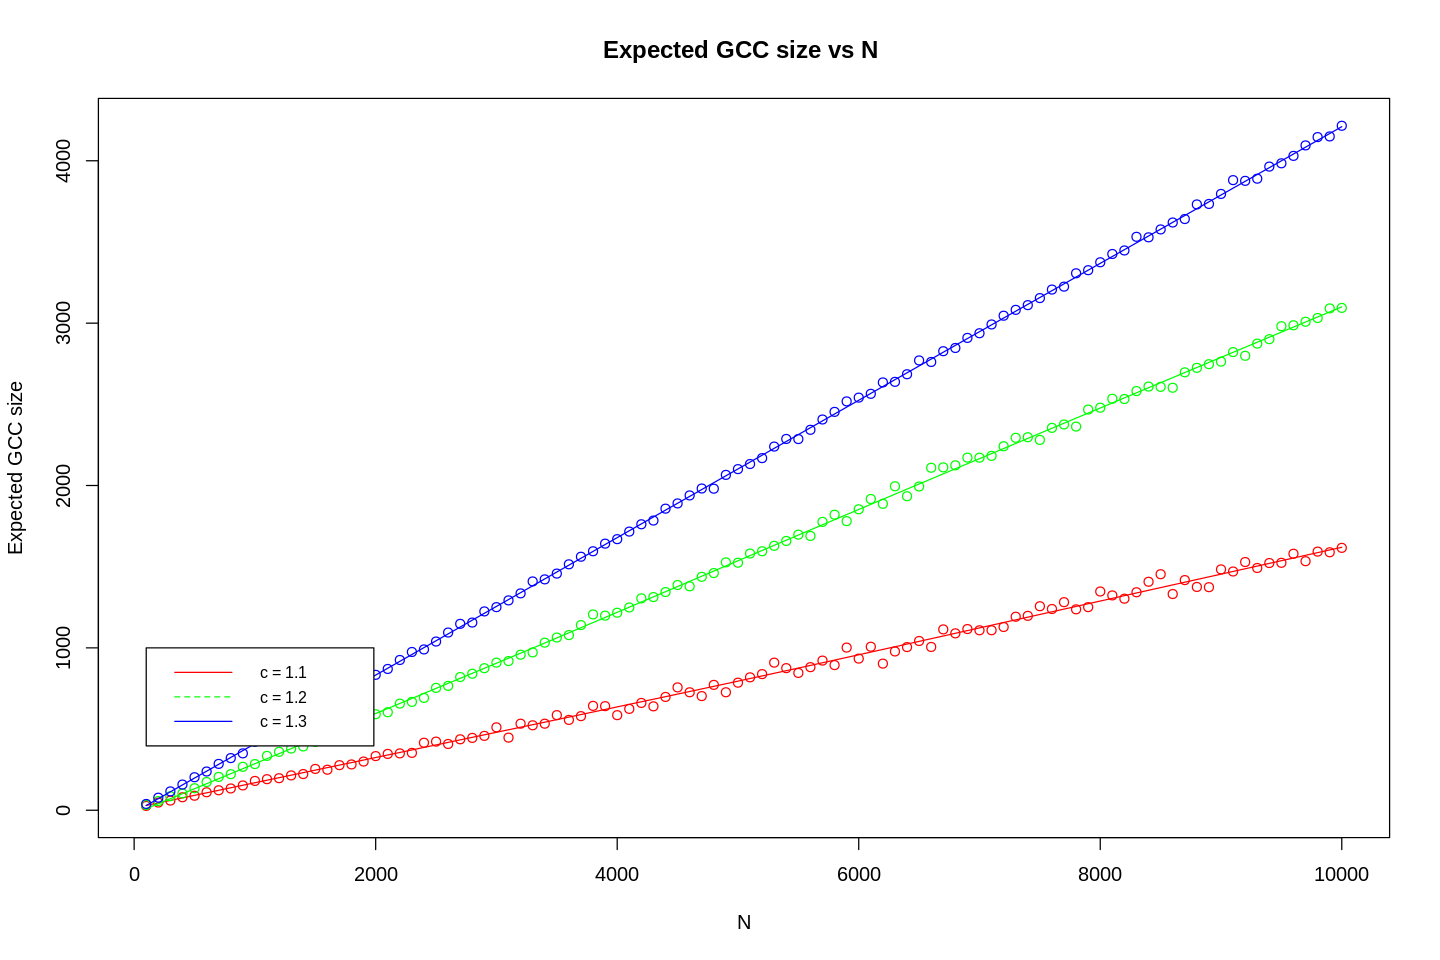

In [61]:
plot(0,0,xlim = c(Nmin,Nmax),ylim = c(0,max(gcc_size)),type = "n",main ="Expected GCC size vs N ",xlab = "N", ylab = "Expected GCC size")

cl <- rainbow(3)

for (i in 1:3){
    lines(N_vec,gcc_size[i+2,],col = cl[i],type = 'b')
    lines(lowess(N_vec,gcc_size[i+2,]), col=cl[i])
}
legend(100, 1000, legend=c("c = 1.1", "c = 1.2","c = 1.3"),
       col=cl, lty=1:2, cex=0.8)
dev.off()

### **Q2.1)** Random walk on ER model

In [116]:
if (!require("pracma")) install.packages("pracma")
library ("pracma")
if (!require("Matrix")) install.packages("matrix")
library ("Matrix")
set.seed(0)
# if (!require("resample")) install.packages("resample")
# library('resample')

Loading required package: resample

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘resample’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [71]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    # print(adj)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    # print(z)
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [91]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    visited_nodes <- seq(from = 1, to = num_steps, by = 1) #stores nodes visited at a step in a random walk
    for(i in 1:num_steps){
        # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF <- transition_matrix[v, ]
        # print(PMF)
        v <- sample(1:vcount(g), 1, prob = PMF)
        visited_nodes[i] = v        
    }
    
    return(visited_nodes)
}

In [92]:
gcc_of_graph = function(g)
{
    if(is_connected(g)) return (g)
    g_components <- clusters(g)
    idx <- which.max(g_components$csize)
    gcc <- induced.subgraph(g,which(g_components$membership == idx))
    return (gcc)
}

In [133]:
stats_of_graph = function(g,num_steps=100,iter=1000)
{
    set.seed(0)
    gcc <- gcc_of_graph(g)
    transition_matrix <- create_transition_matrix(gcc)
    print("Transition matrix created ")
    dist <- matrix(NA, nrow=iter, ncol=num_steps)
    end_nodes <- array(1:iter)
    print(sprintf("Length of endnode = %d",length(end_nodes)))
    for( i in 1:iter)
    {
        start_node <- sample(1:vcount(gcc), 1)
        visited_nodes <- random_walk(gcc, num_steps, start_node, transition_matrix)
        end_nodes[i] <- visited_nodes[num_steps]
        dist[i,] <- shortest.paths(gcc,visited_nodes,start_node)
    }
    print("distance matrix created ")
    plot(colMeans(dist), type="b", main = "<s(t)> v/s t", xlab = "t", ylab = "<s(t)>")
    # lines(lowess(colMeans(dist)), col="red")
    plot(colVars(dist), type="b", main = "standard deviation σ(s(t))^2  v/s t", xlab = "t", ylab = "σ(s(t))^2")
    # lines(lowess(colVars(dist)), col="red")
    return (end_nodes)
}

In [134]:
num_nodes <- 1000
prob_conn <- 0.01
num_steps <- 100
iter <- 100

#### **2.1**
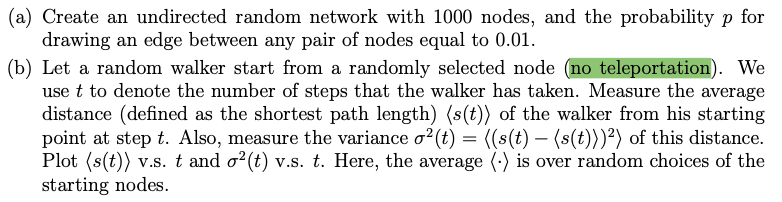

---


[1] "Transition matrix created "
[1] "Length of endnode = 100"
[1] "distance matrix created "


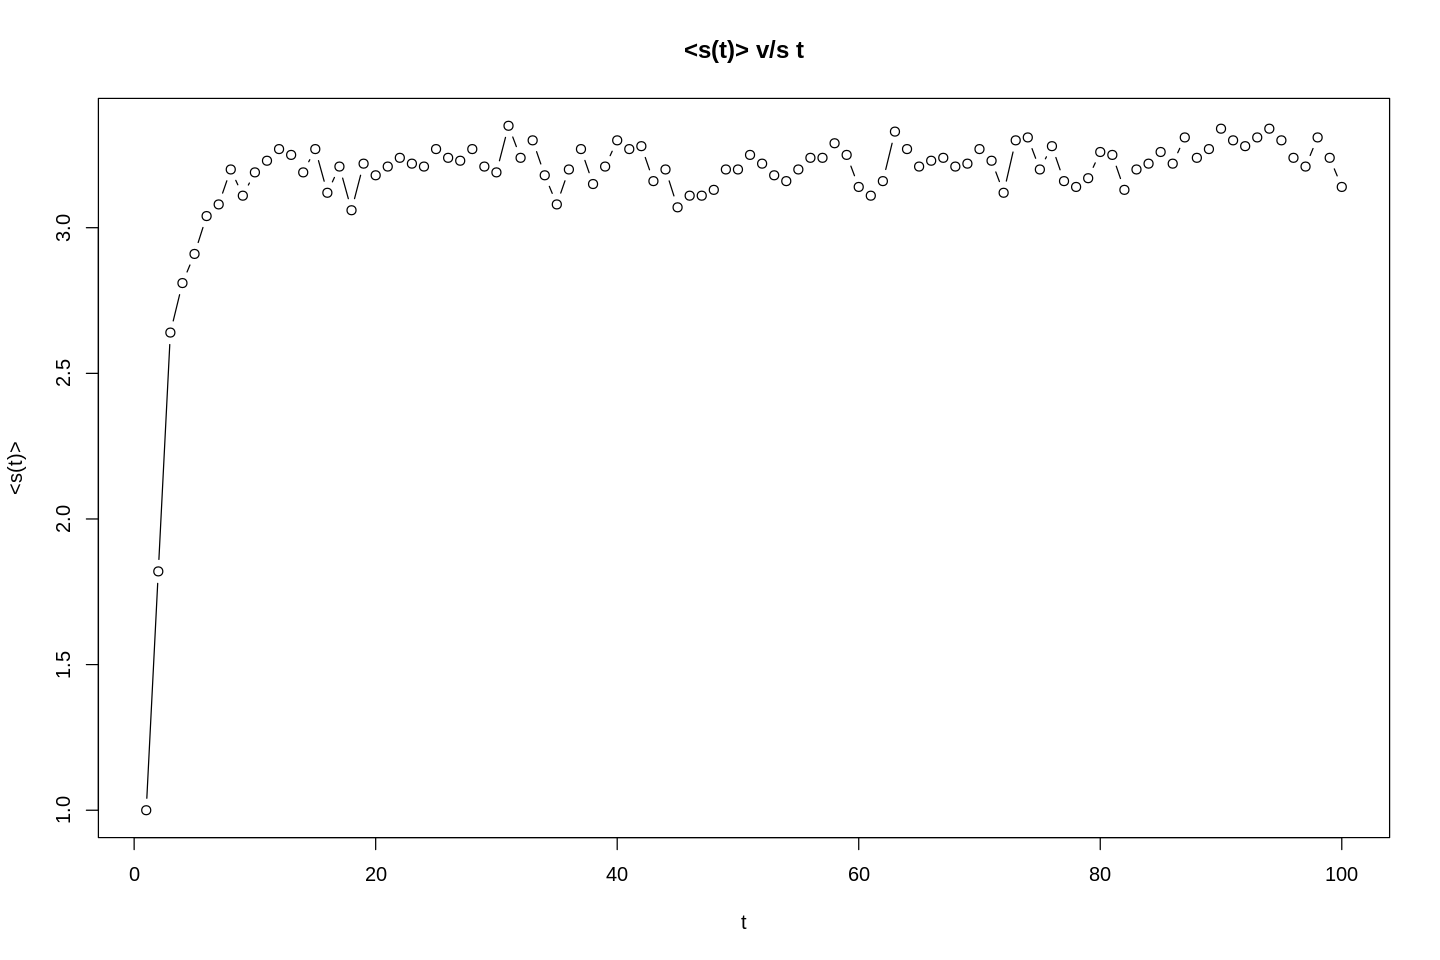

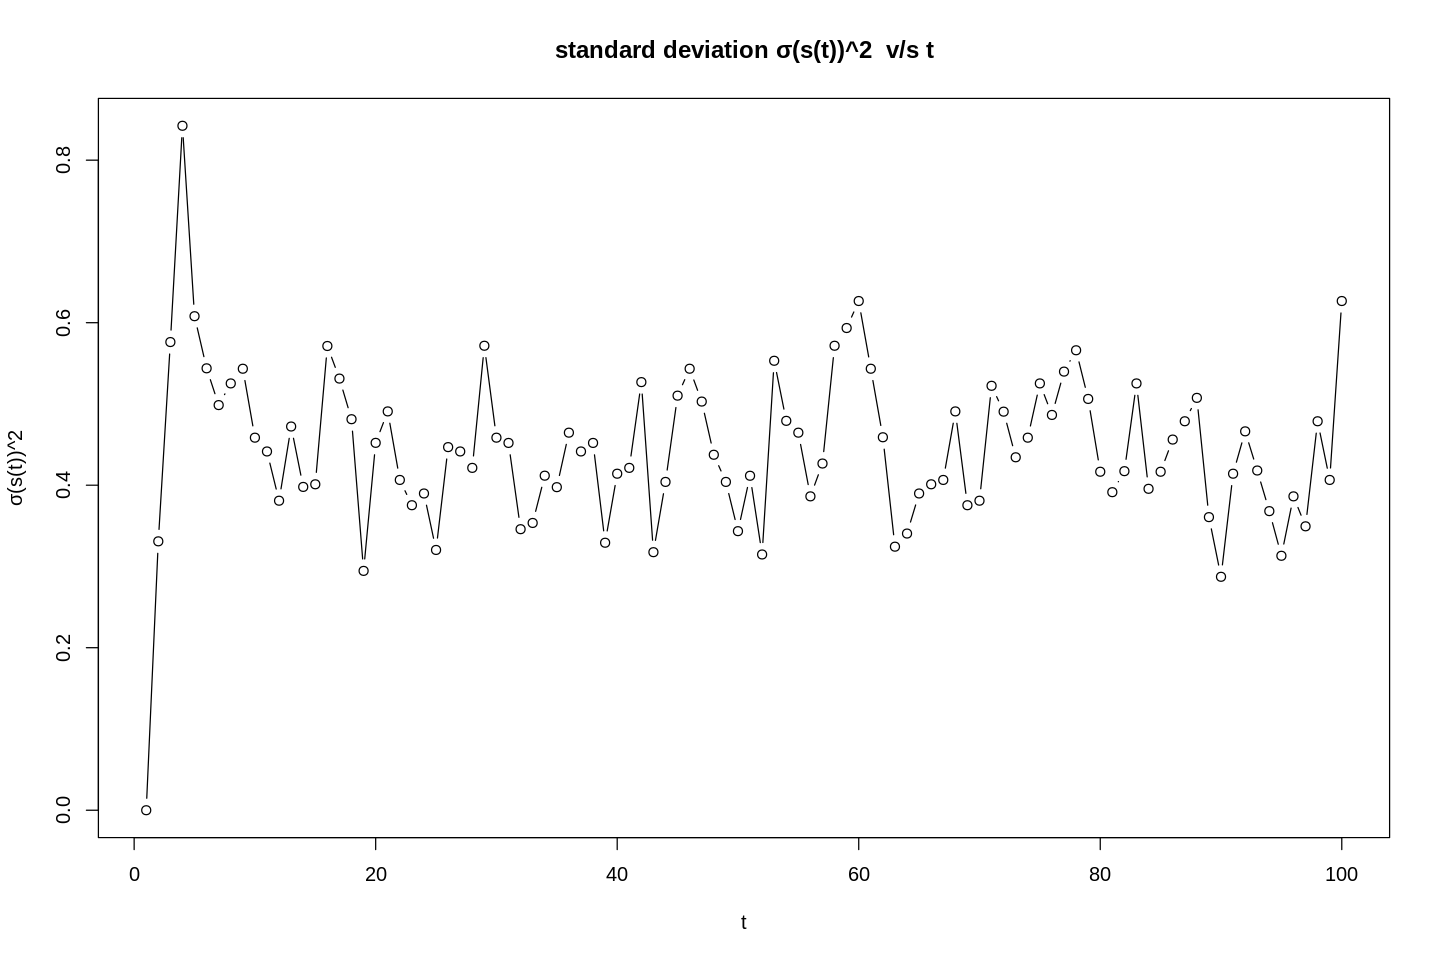

In [135]:
#part 2.1.a) and 2.1.b)
g1 = erdos.renyi.game(num_nodes, p=prob_conn, directed=F)
end_nodes <- stats_of_graph(g1,num_steps,iter)

#### **2.1.c**

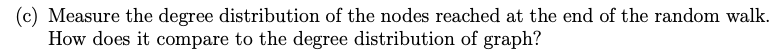

---

From the graph below it can be observed that degree distribution of the end node of the random walk and degree distribution of graph are both binomial distribution with almost similar mean and variance.

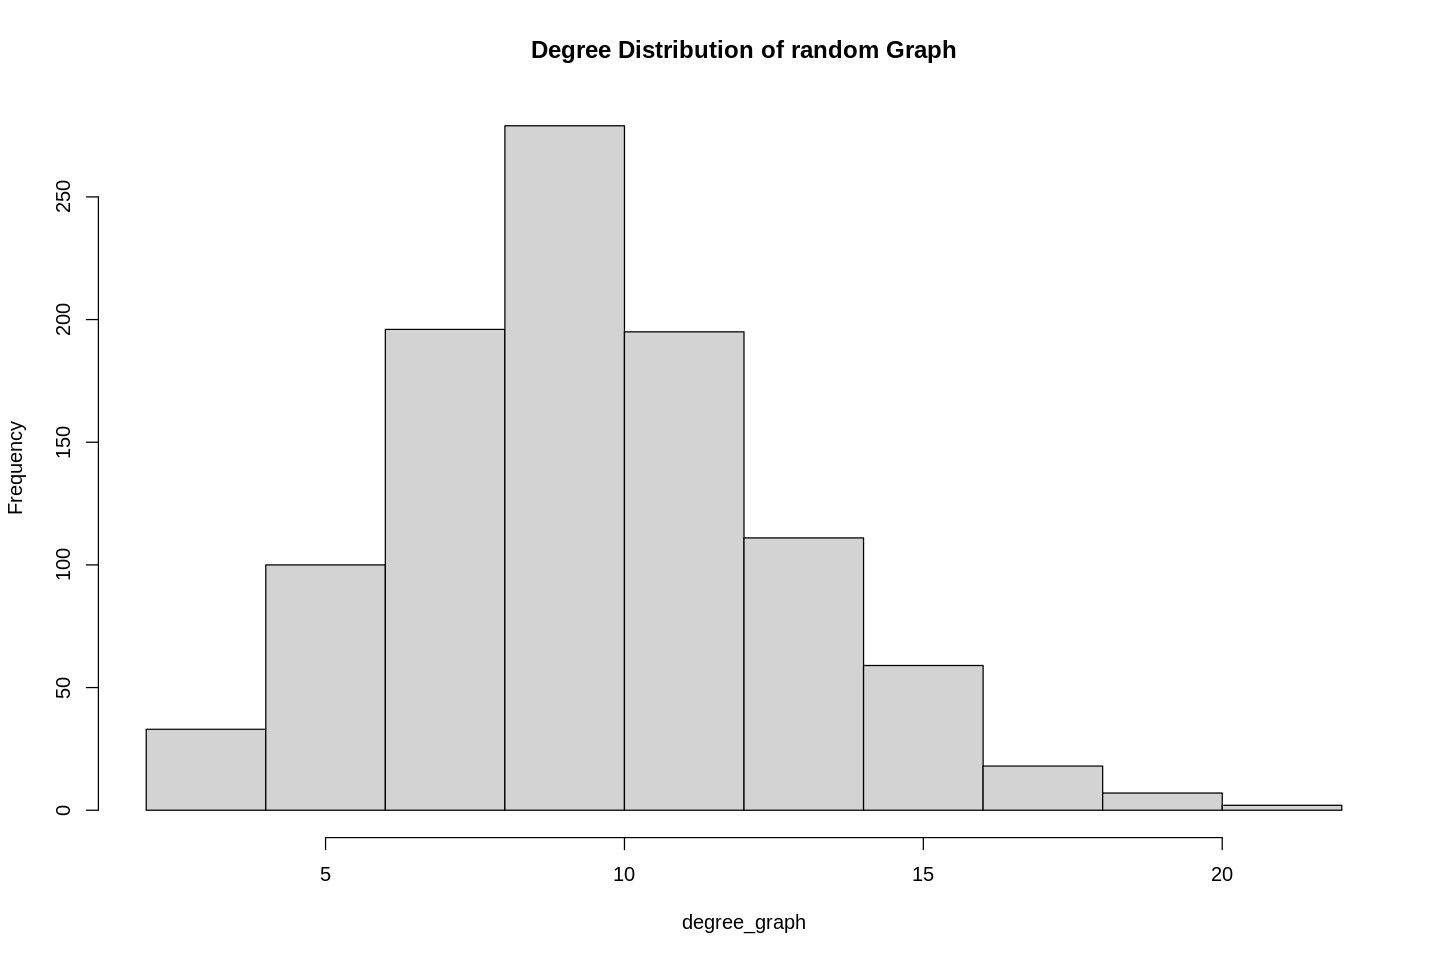

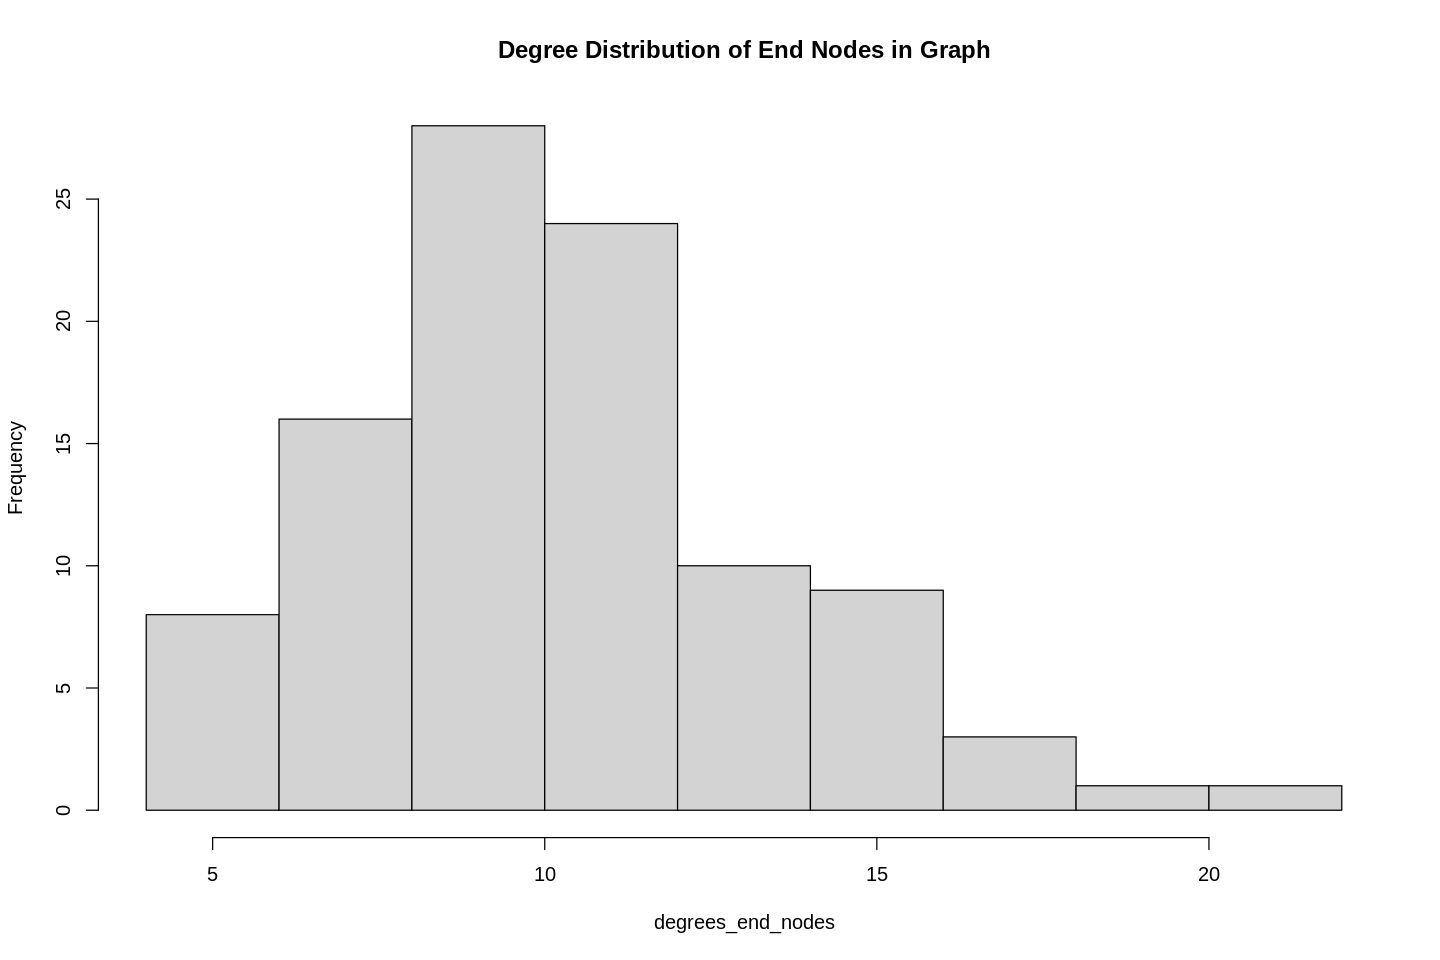

In [137]:
#part 2.1.c) degree distribution 
degree_graph <- degree(g1)
hist(degree_graph, main = "Degree Distribution of random Graph")

degrees_end_nodes <- degree(g1, end_nodes)
hist(degrees_end_nodes, main = "Degree Distribution of End Nodes in Graph")


#### **2.1.d**
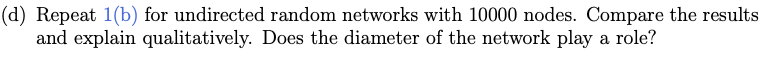

---

The observation for both the case n = 1000, and n = 10,000 is tabulated below.

<!-- \begin{array}{ccccc}
N     & Diameter & tss  &  <s(tss)>  & σ(s(t))^2   \\
1000  & 5        & 10   & 3.30       & 0.45         \\
10000 & 3        & 5    & 2.30       & 0.25         
                  
\end{array} -->

\begin{array}{ccccc}
N     & Diameter & tss  &  <s(tss)>  & var(s(t))   \\
1000  & 5        & 10   & 3.30       & 0.45         \\
10000 & 3        & 5    & 2.30       & 0.25         
\end{array}

From the table we can clearly see that for node = 1000, it reaches steady state at around steps = 10 and mean distance around steady state is 3.3 while variance is 0.45. There is also quite fluctuation in variance.Diameter for n =1000 is 5.
while for node = 10000, steady state is reached after 5 steps,and mean distance around steady state is 2.3 while variance is 0.25. There fluctuation in variance has also reduced significantly.Diameter for n =10000 is 3. 
From this we can conclude that for larger network the network is more concentrated toward the starting point, which can be inferred from the fact that diameter of graph for n =10000 is less than for n = 1000. This is also analogous to the fact that for same number of steps the average distance to convergence is lower for larger network as compared to smaller network.  

[1] "Transition matrix created "
[1] "Length of endnode = 100"
[1] "distance matrix created "


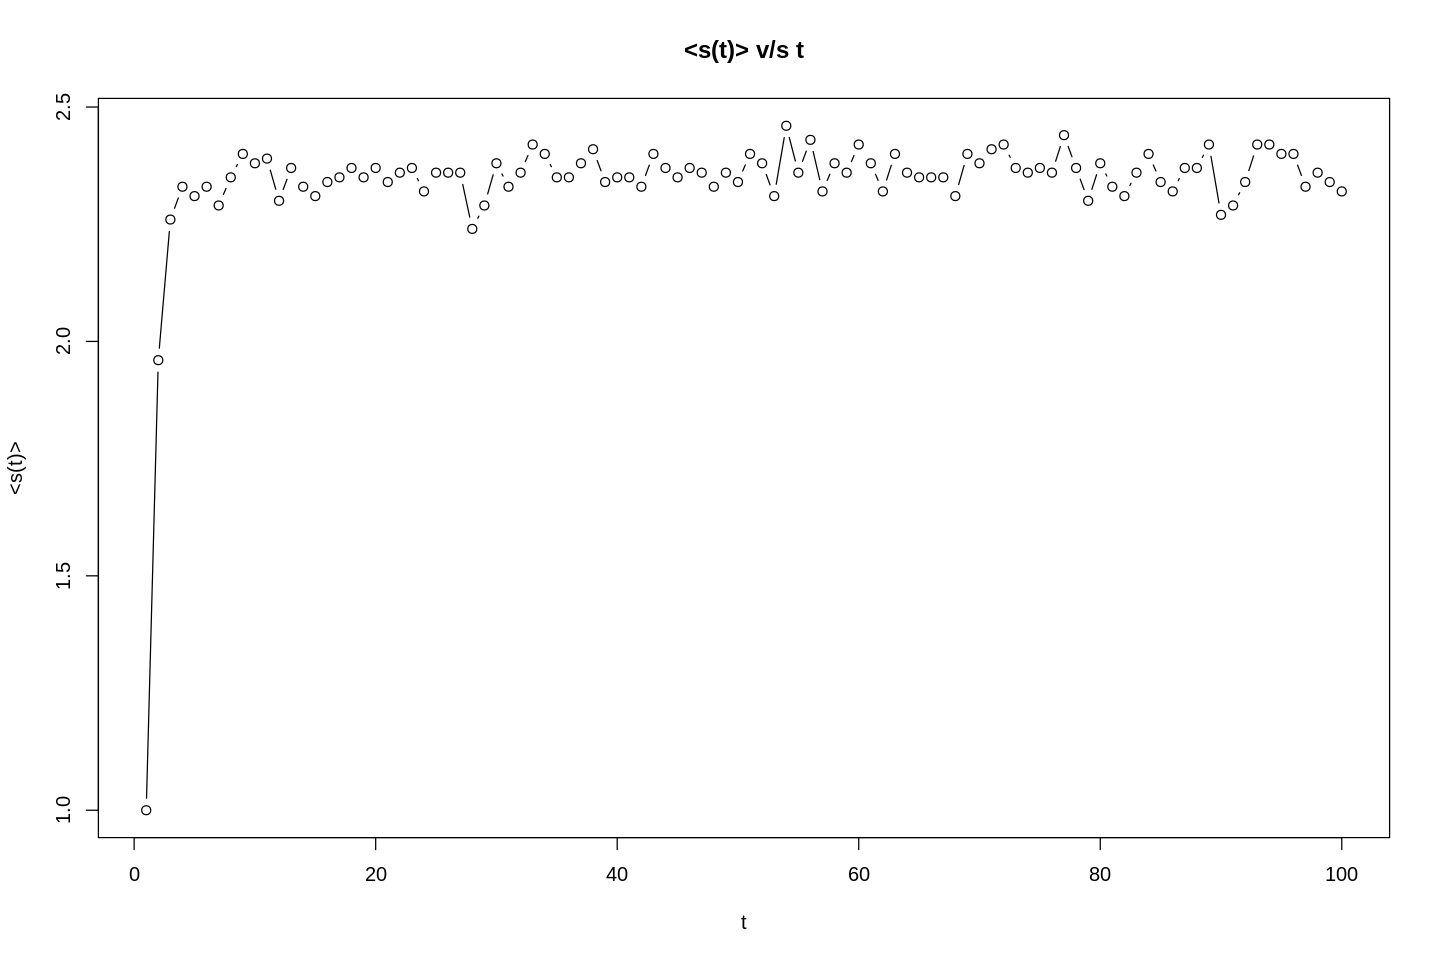

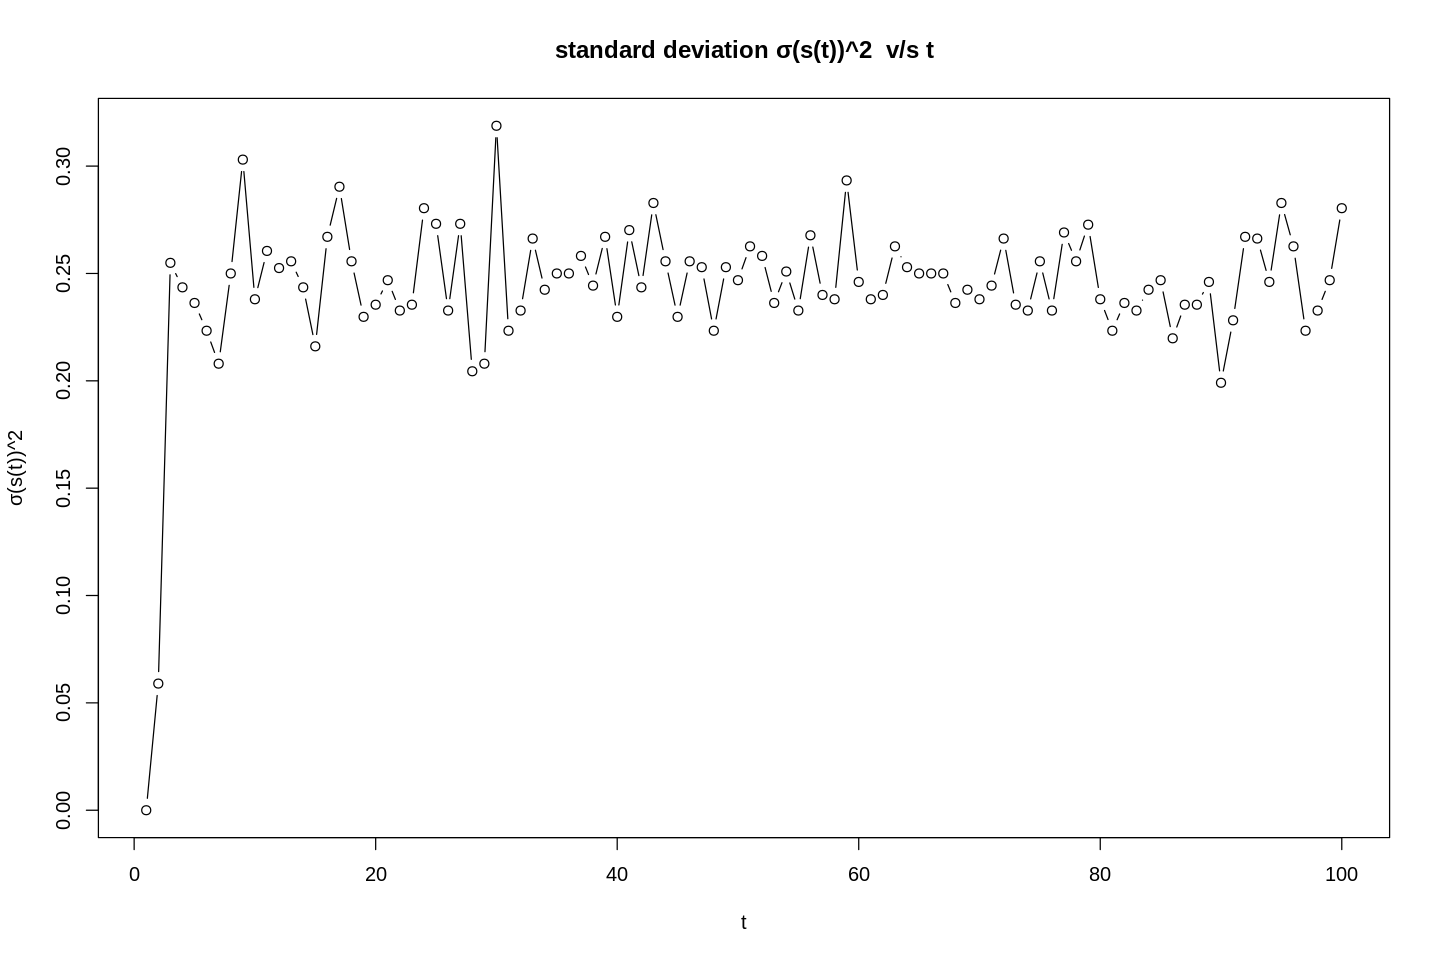

In [138]:
#part 2.1.d) with num node 10000
num_nodes <- 10000
g2 = erdos.renyi.game(num_nodes, p=prob_conn, directed=F)
end_nodes <- stats_of_graph(g2,num_steps,iter)